In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
filename ='original_dataset/pd_speech_features.csv'
dataframe = pd.read_csv(filename)

In [3]:
dataframe.shape

(757, 755)

In [4]:
dataframe.head()

,Unnamed: 0,Unnamed: 1,Baseline Features,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 745,Unnamed: 746,Unnamed: 747,Unnamed: 748,Unnamed: 749,Unnamed: 750,Unnamed: 751,Unnamed: 752,Unnamed: 753,Unnamed: 754
0,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1


In [5]:
new_header = dataframe.iloc[0] #grab the first row for the header
dataframe = dataframe[1:] #take the data less the header row
dataframe.columns = new_header #set the header row as the df header

In [6]:
new_header

Unnamed: 0                                  id
Unnamed: 1                              gender
Baseline Features                          PPE
Unnamed: 3                                 DFA
Unnamed: 4                                RPDE
                               ...            
Unnamed: 750         tqwt_kurtosisValue_dec_33
Unnamed: 751         tqwt_kurtosisValue_dec_34
Unnamed: 752         tqwt_kurtosisValue_dec_35
Unnamed: 753         tqwt_kurtosisValue_dec_36
Unnamed: 754                             class
Name: 0, Length: 755, dtype: object

In [7]:
dataframe

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
5,1,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,250,0,0.80903,0.56355,0.28385,417,416,0.004626942,5.22E-05,0.00064,...,3.0706,3.019,3.1212,2.4921,3.5844,3.54,3.3805,3.2003,6.8671,0
753,250,0,0.16084,0.56499,0.59194,415,413,0.004549703,0.000219994,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.417,0
754,251,0,0.88389,0.72335,0.46815,381,380,0.005069271,0.000102654,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
755,251,0,0.83782,0.7489,0.49823,340,339,0.005679019,5.51E-05,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [8]:
dataframe.columns.shape

(755,)

In [9]:
dataframe.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
5,1,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


# Data Extraction from the dataset
Baseline Features: Column-3 to Column-23 Intensity Parameters: Col24 to Col26 Formant Frequencies: Col27 to Col30 Bandwidth Parameters: Col31 to Col34 Vocal Fold: Col35 to Col56 MFCC: Col57 to Col140 Wavelet Features: Col141 to Col322 TQWT Features: Col323 to Col754 Class: Col755

Refer Research Page: 6 - 9

In [11]:
baseline = dataframe.iloc[:,2:23]
intensity = dataframe.iloc[:,23:26]
frequency = dataframe.iloc[:,26:30]
bandwidth = dataframe.iloc[:,30:34]
vocal = dataframe.iloc[:,34:56]
mfcc = dataframe.iloc[:,56:140]
wavelet = dataframe.iloc[:,140:322]
tqwt = dataframe.iloc[:,322:755]
y = dataframe['class']

In [36]:
baseline

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity
1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,1.76E-05,0.00067,...,0.002,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995
2,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,1.61E-05,0.00052,...,0.00157,0.05516,0.502,0.0232,0.03675,0.06195,0.06961,0.984322,0.017974,21.497
3,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,1.47E-05,0.00057,...,0.00171,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651
4,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,4.55E-05,0.00149,...,0.00446,0.05451,0.527,0.02395,0.02857,0.04462,0.07185,0.968343,0.042003,19.865
5,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,4.37E-05,0.00166,...,0.00499,0.0561,0.497,0.02909,0.03327,0.05278,0.08728,0.975754,0.027139,19.557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.80903,0.56355,0.28385,417,416,0.004626942,5.22E-05,0.00064,2.97E-06,8.00E-05,...,0.00024,0.01947,0.171,0.01068,0.0126,0.01547,0.03204,0.997438,0.002571,26.813
753,0.16084,0.56499,0.59194,415,413,0.004549703,0.000219994,0.00143,6.50E-06,0.00016,...,0.00047,0.04291,0.482,0.02307,0.02626,0.03272,0.0692,0.976867,0.025519,17.802
754,0.88389,0.72335,0.46815,381,380,0.005069271,0.000102654,0.00076,3.87E-06,0.00011,...,0.00034,0.02978,0.263,0.01597,0.01916,0.02271,0.0479,0.995544,0.00448,24.005
755,0.83782,0.7489,0.49823,340,339,0.005679019,5.51E-05,0.00092,5.24E-06,0.00017,...,0.00052,0.03552,0.311,0.01791,0.02348,0.02648,0.05373,0.988241,0.011931,19.706


# Baseline Columns


In [16]:
mean_value_columns = [cols for cols in baseline.columns if cols.__contains__('mean')]
std_value_columns = [cols for cols in baseline.columns if cols.__contains__('std')]
other_columns = list(set(baseline.columns) - set(mean_value_columns) - set(std_value_columns))

In [34]:
extracted_df = baseline[other_columns].join([intensity,frequency,bandwidth,y])
extracted_df.shape

(756, 28)

# Exploratory_data_analysis

In [35]:
extracted_df.columns #checking columns

Index(['ppq5Jitter', 'numPeriodsPulses', 'DFA', 'ddpJitter', 'ddaShimmer',
       'apq5Shimmer', 'locPctJitter', 'locDbShimmer', 'locAbsJitter',
       'apq3Shimmer', 'apq11Shimmer', 'locShimmer', 'rapJitter', 'PPE', 'RPDE',
       'numPulses', 'minIntensity', 'maxIntensity', 'meanIntensity', 'f1',
       'f2', 'f3', 'f4', 'b1', 'b2', 'b3', 'b4', 'class'],
      dtype='object')

In [37]:
extracted_df= extracted_df.astype(float) #converting data types from object to float
extracted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 1 to 756
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ppq5Jitter        756 non-null    float64
 1   numPeriodsPulses  756 non-null    float64
 2   DFA               756 non-null    float64
 3   ddpJitter         756 non-null    float64
 4   ddaShimmer        756 non-null    float64
 5   apq5Shimmer       756 non-null    float64
 6   locPctJitter      756 non-null    float64
 7   locDbShimmer      756 non-null    float64
 8   locAbsJitter      756 non-null    float64
 9   apq3Shimmer       756 non-null    float64
 10  apq11Shimmer      756 non-null    float64
 11  locShimmer        756 non-null    float64
 12  rapJitter         756 non-null    float64
 13  PPE               756 non-null    float64
 14  RPDE              756 non-null    float64
 15  numPulses         756 non-null    float64
 16  minIntensity      756 non-null    float64
 1

In [38]:
#checking for missing values
extracted_df.isnull().sum()

ppq5Jitter          0
numPeriodsPulses    0
DFA                 0
ddpJitter           0
ddaShimmer          0
apq5Shimmer         0
locPctJitter        0
locDbShimmer        0
locAbsJitter        0
apq3Shimmer         0
apq11Shimmer        0
locShimmer          0
rapJitter           0
PPE                 0
RPDE                0
numPulses           0
minIntensity        0
maxIntensity        0
meanIntensity       0
f1                  0
f2                  0
f3                  0
f4                  0
b1                  0
b2                  0
b3                  0
b4                  0
class               0
dtype: int64

In [39]:
extracted_df.describe()

,ppq5Jitter,numPeriodsPulses,DFA,ddpJitter,ddaShimmer,apq5Shimmer,locPctJitter,locDbShimmer,locAbsJitter,apq3Shimmer,...,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.00000,7.560000e+02,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.001159,322.678571,0.700414,0.001815,0.103125,0.041175,0.002324,0.60642,1.673391e-05,0.034375,...,73.997008,647.174519,1233.852088,2562.425251,3547.259244,213.363237,297.174077,536.821070,506.604856,0.746032
std,0.001677,99.402499,0.069718,0.002942,0.067097,0.027165,0.002628,0.38257,2.290134e-05,0.022366,...,7.018006,134.957916,169.090402,393.315598,347.864299,306.976045,450.125488,754.341717,658.326606,0.435568
min,0.000050,1.000000,0.543500,0.000050,0.010040,0.004150,0.000210,0.05700,6.860000e-07,0.003350,...,39.984109,237.149533,761.357661,1411.231297,2471.996546,13.525000,16.428803,21.164397,22.842528,0.000000
25%,0.000370,250.000000,0.647053,0.000450,0.053538,0.021935,0.000970,0.31875,5.260000e-06,0.017843,...,70.920615,562.879119,1117.316190,2380.426103,3288.644496,90.939702,102.856320,152.783110,170.741827,0.000000
50%,0.000650,316.000000,0.700525,0.000840,0.083945,0.033705,0.001495,0.50250,9.530000e-06,0.027980,...,76.855313,641.181498,1215.344125,2612.204198,3544.012403,141.610973,159.991186,265.964575,307.971279,1.000000
75%,0.001253,383.250000,0.754985,0.001952,0.134000,0.053023,0.002520,0.79650,1.832500e-05,0.044665,...,78.718785,737.222678,1339.826741,2831.959198,3807.332055,234.098376,299.912765,518.822036,557.628796,1.000000
max,0.018320,905.000000,0.852640,0.033150,0.391540,0.199510,0.027750,2.11400,2.564800e-04,0.130510,...,85.096353,1015.524047,1922.747225,3475.648017,4482.258531,4744.875736,4262.170070,6116.039922,5804.342078,1.000000


# Univariate Analysis

# Count Plot

/home/sushmita/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


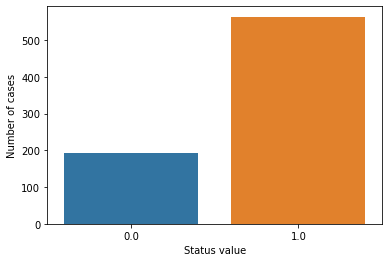

In [52]:
sns.countplot(extracted_df['class'].values)
plt.xlabel("Status value")
plt.ylabel("Number of cases")
plt.show()

In [53]:
len(extracted_df.columns)

28

# Data visualization

# Distribution Plot

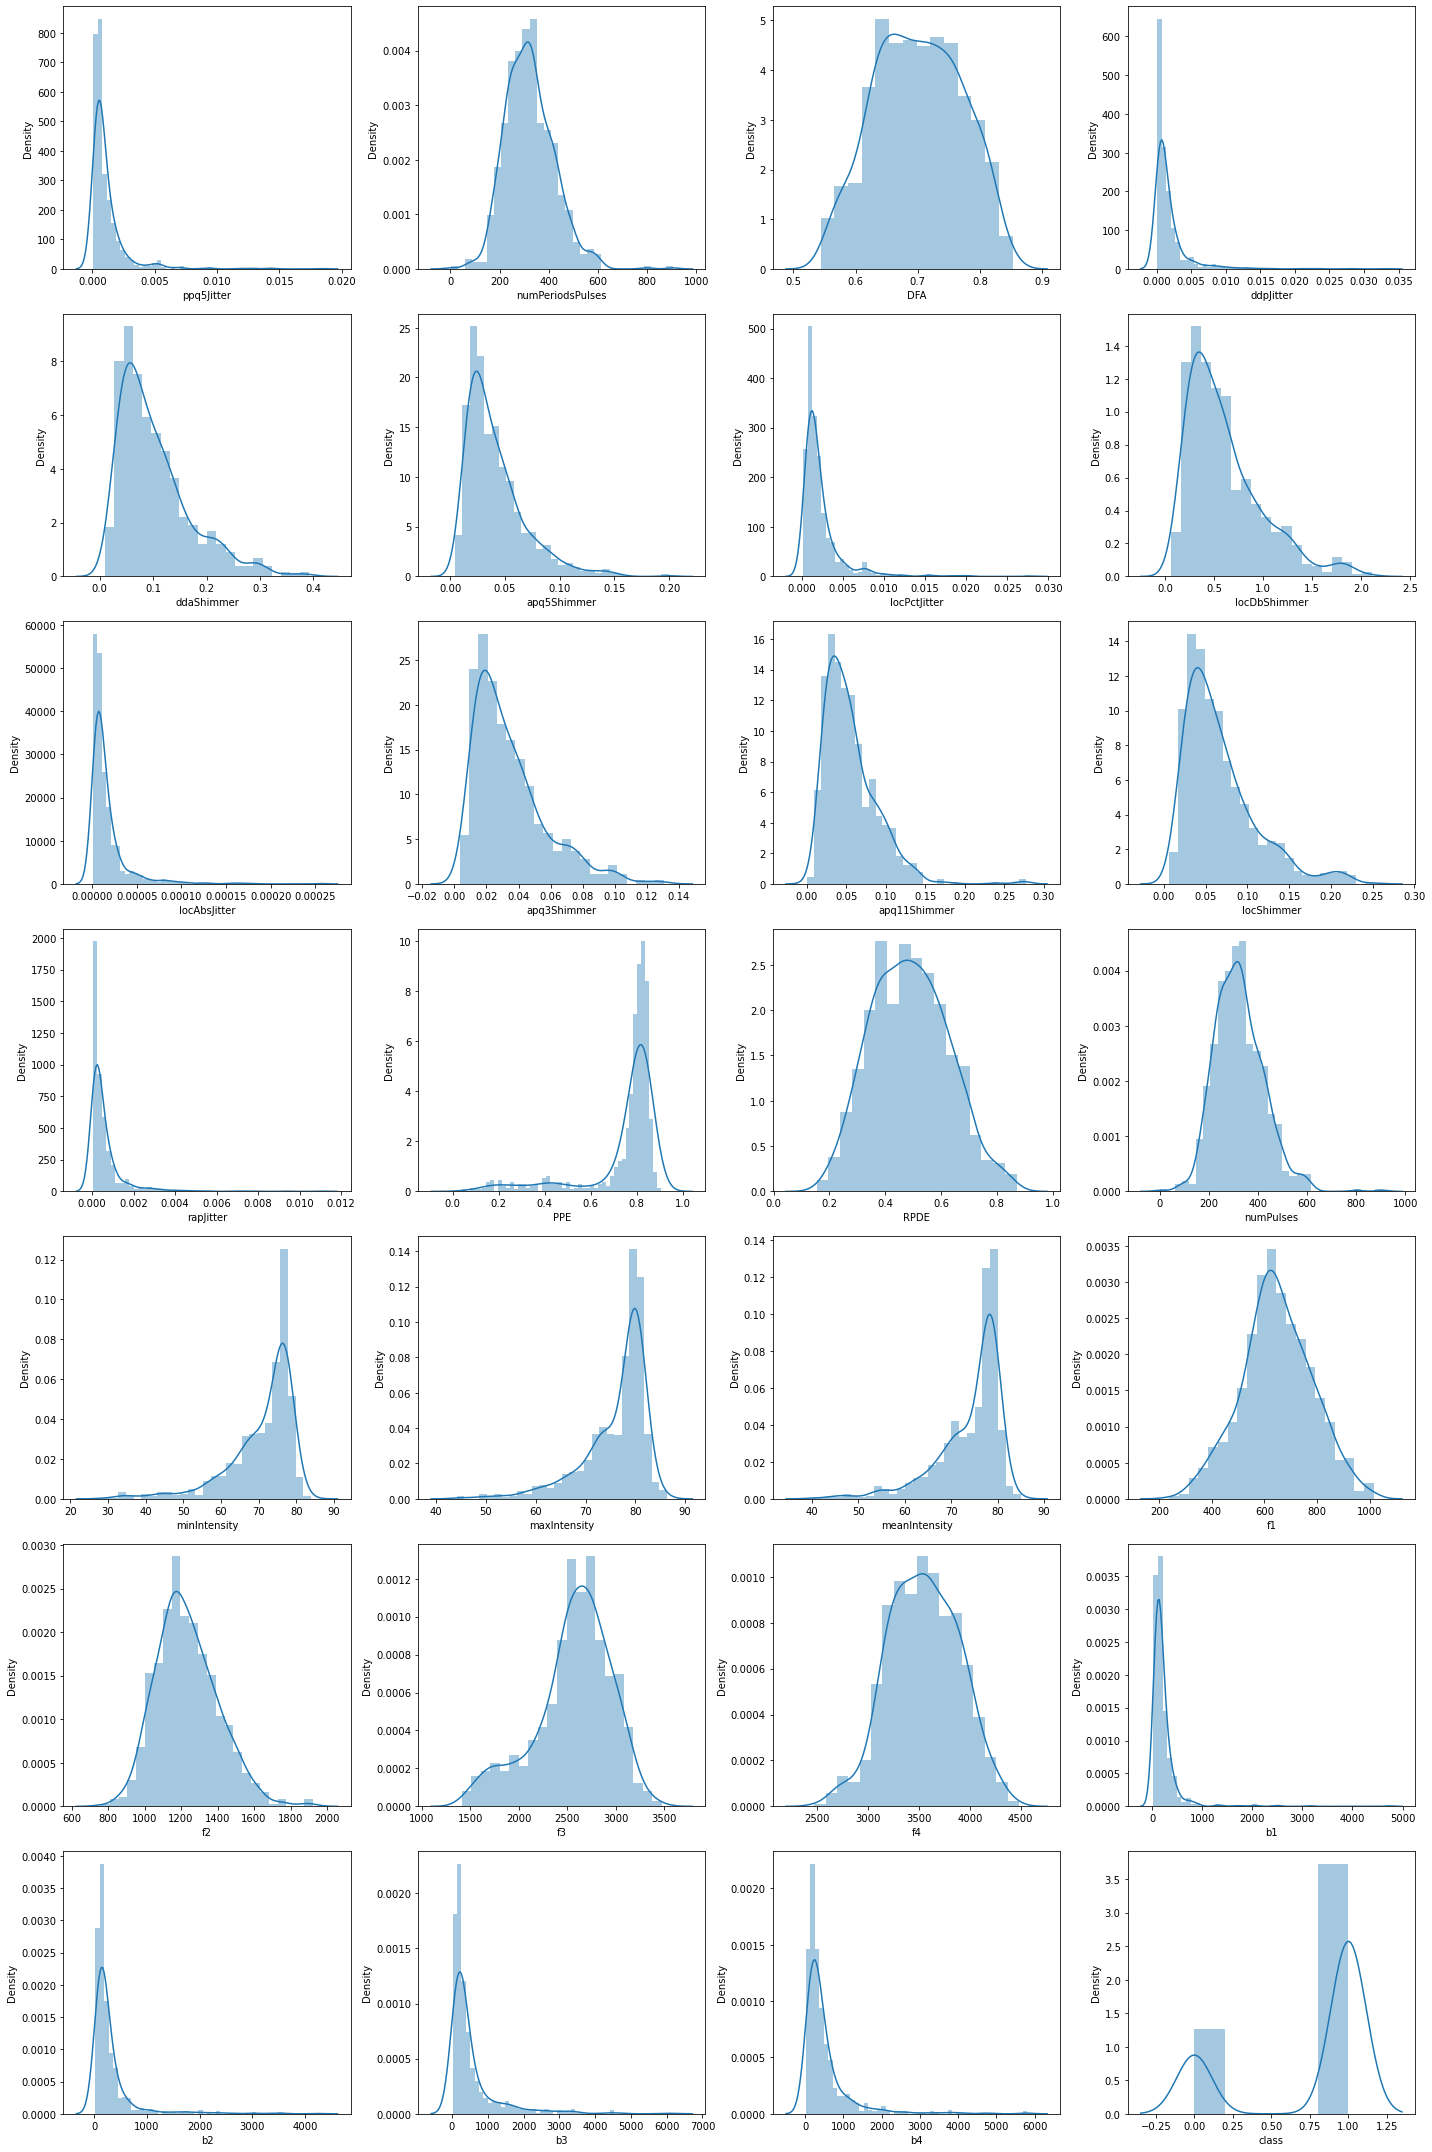

In [64]:
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize = (20, 30))
plotnumber = 1
for col in extracted_df.columns:
    if plotnumber <= len(extracted_df.columns):
        ax = plt.subplot(7, 4, plotnumber)
        sns.distplot(extracted_df[col])
        plt.xlabel(col)
    
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# KDE Plot


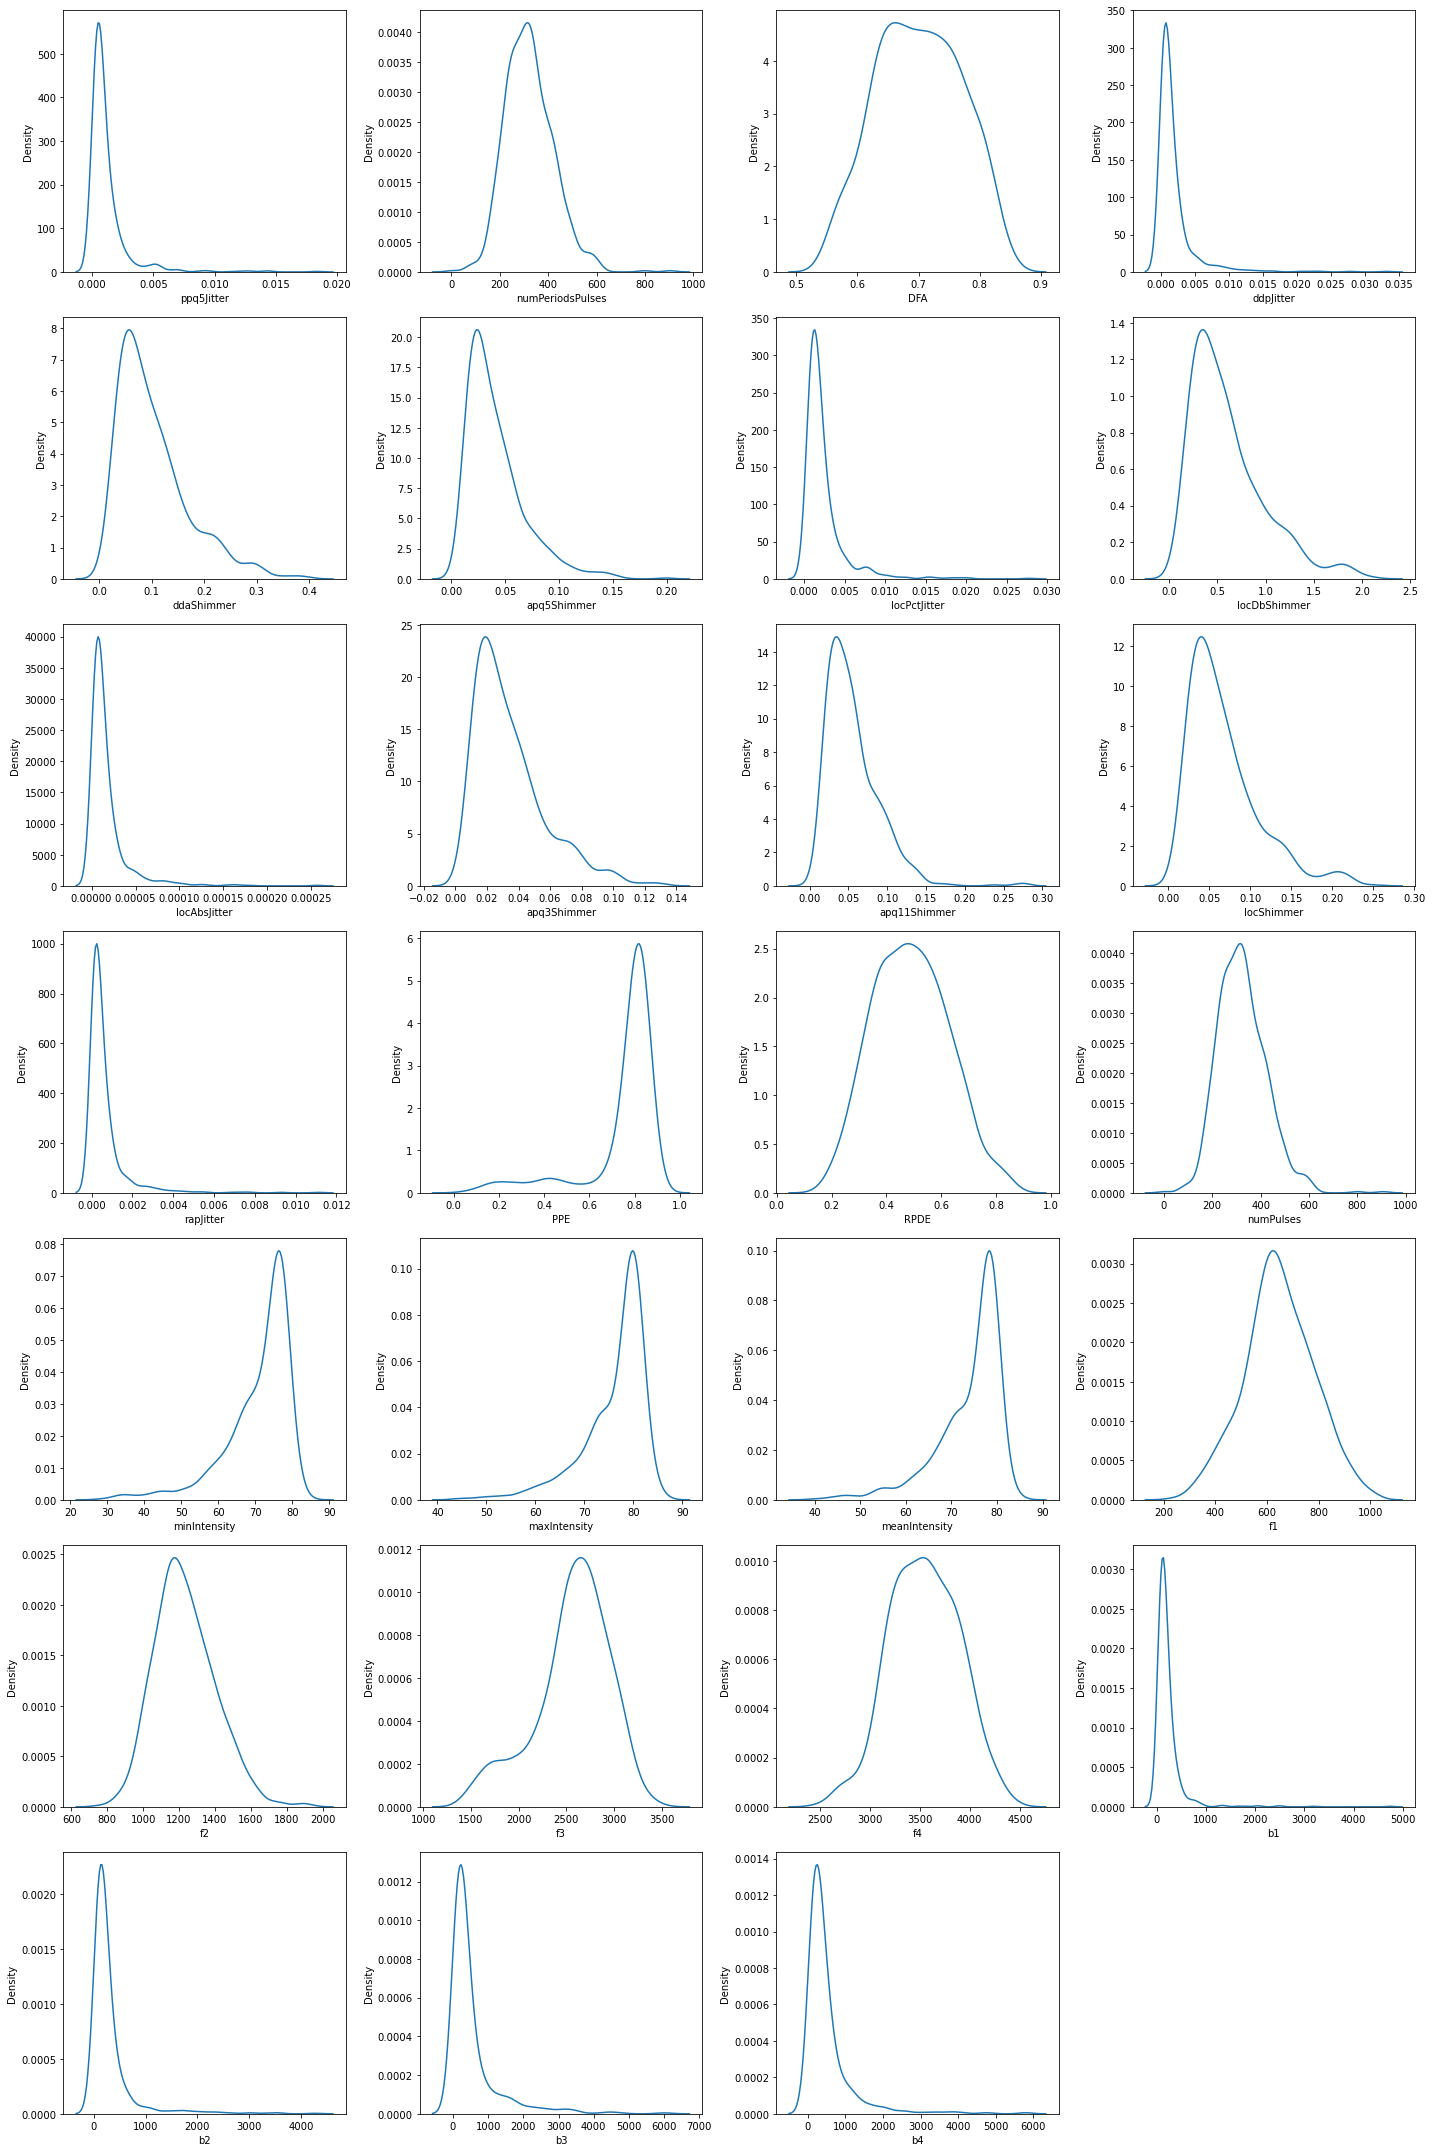

In [99]:
plt.figure(figsize = (20, 30))
plotnumber = 1

for col in extracted_df.columns:
    if plotnumber <= (len(extracted_df.columns)-1):
        ax = plt.subplot(7, 4, plotnumber)
        sns.kdeplot(extracted_df[col]) 
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# Outliers Detection using Box Plot

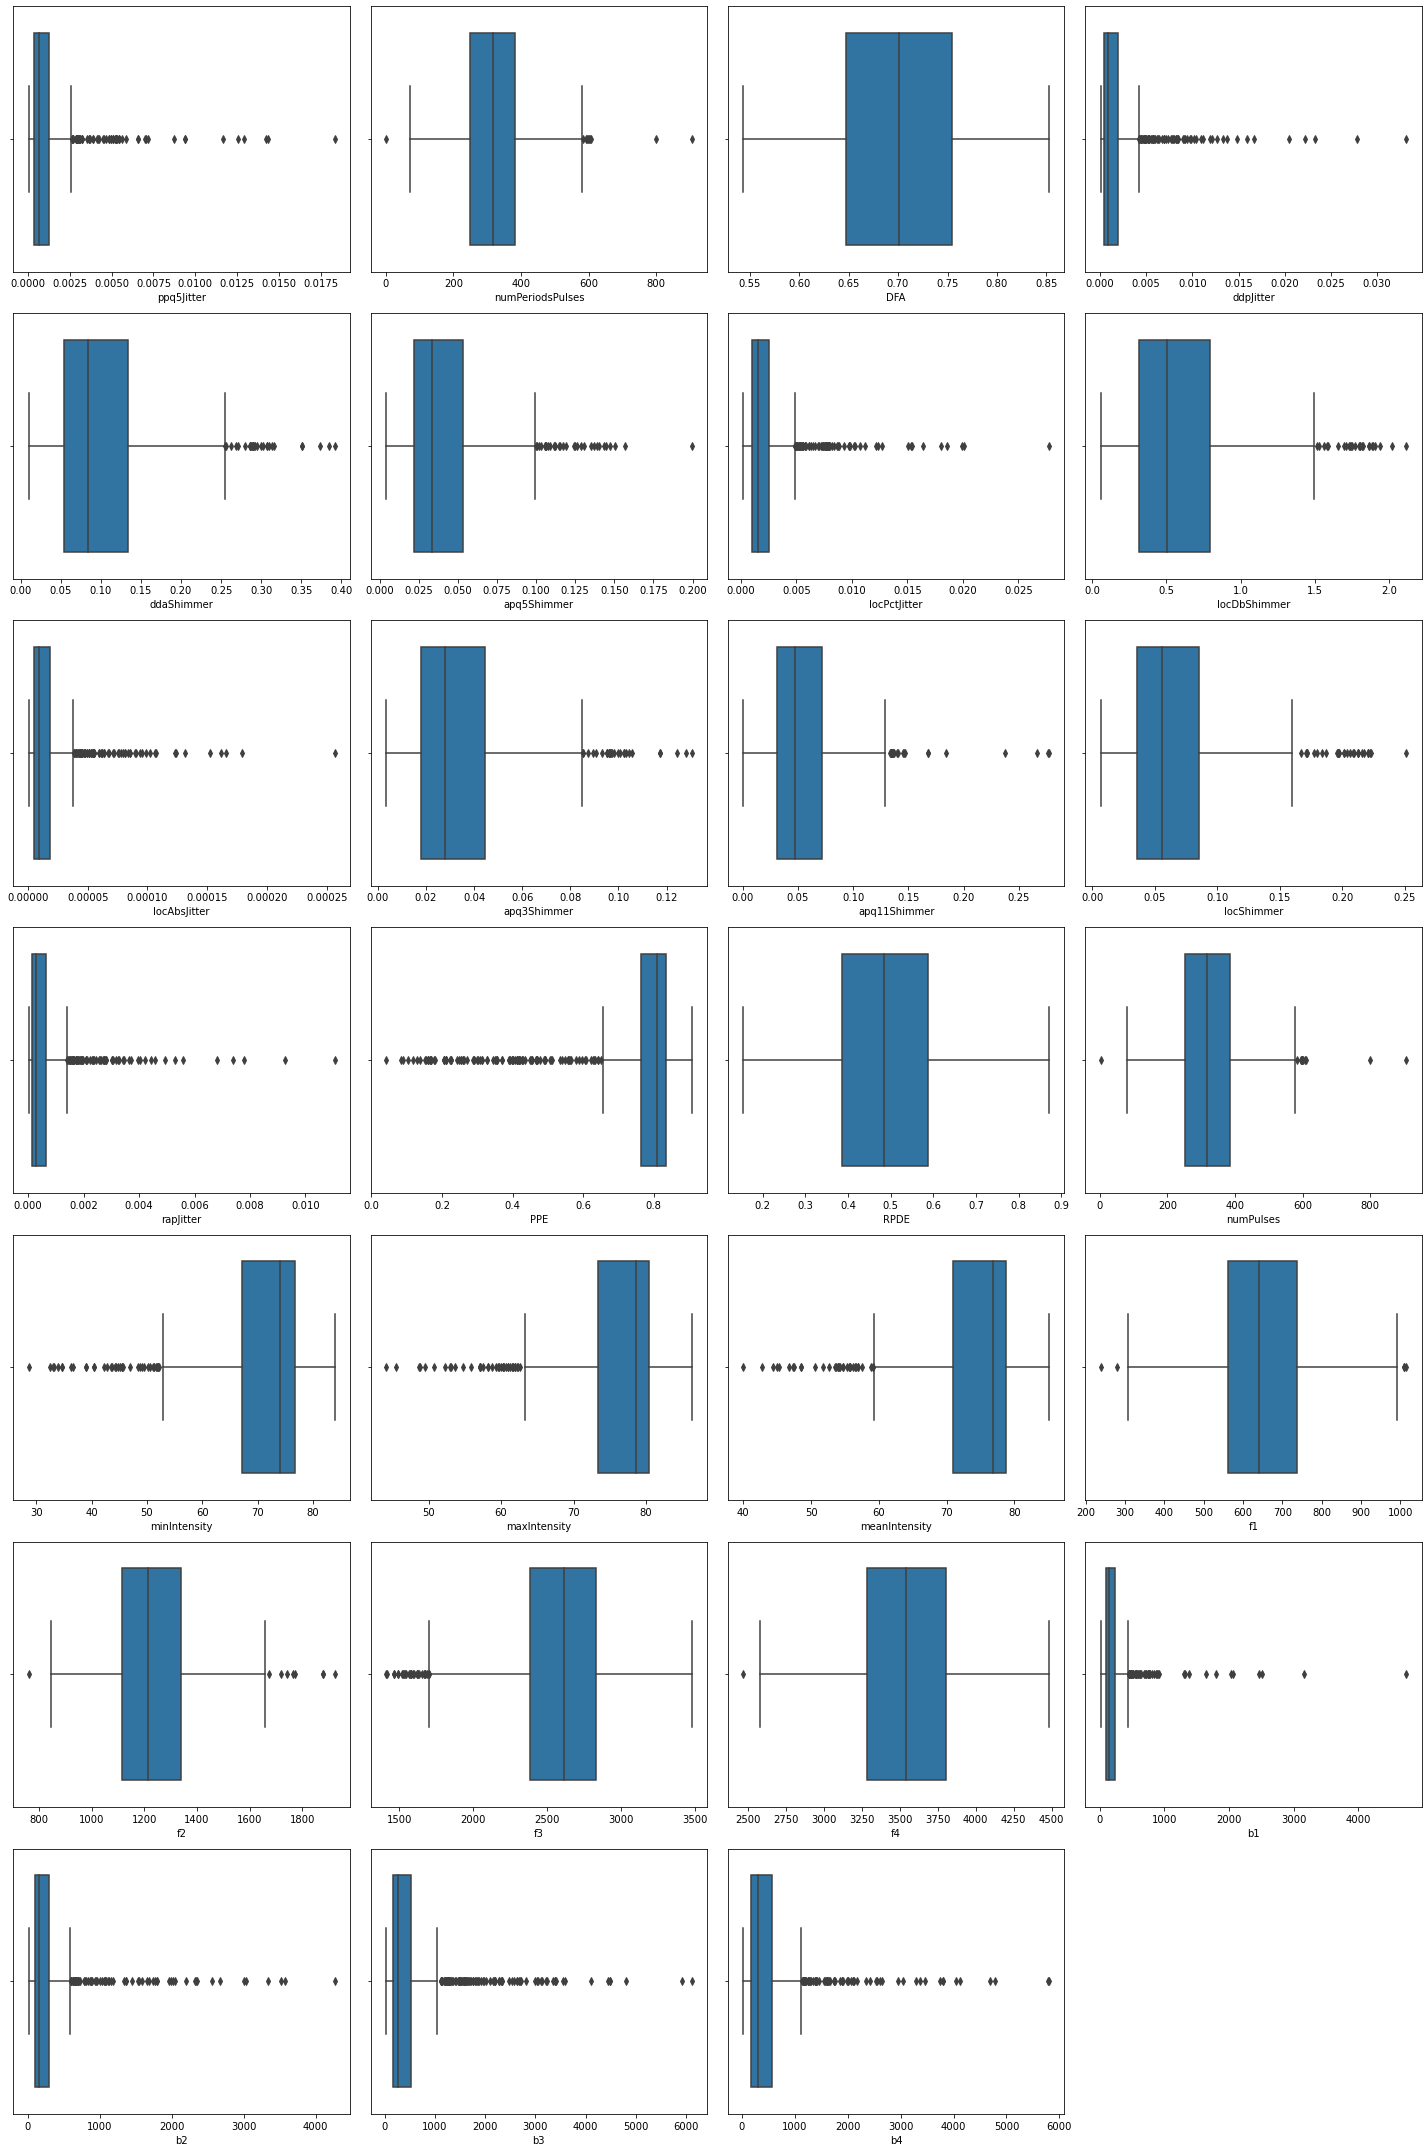

In [84]:
plt.figure(figsize = (20, 30))
plotnumber = 1

for col in extracted_df.columns:
    if plotnumber <= (len(extracted_df.columns)-1):
        ax = plt.subplot(7, 4, plotnumber)
        sns.boxplot(x=col, data=extracted_df) 
        plt.xlabel(col)

        
    plotnumber += 1

plt.tight_layout()
plt.show()

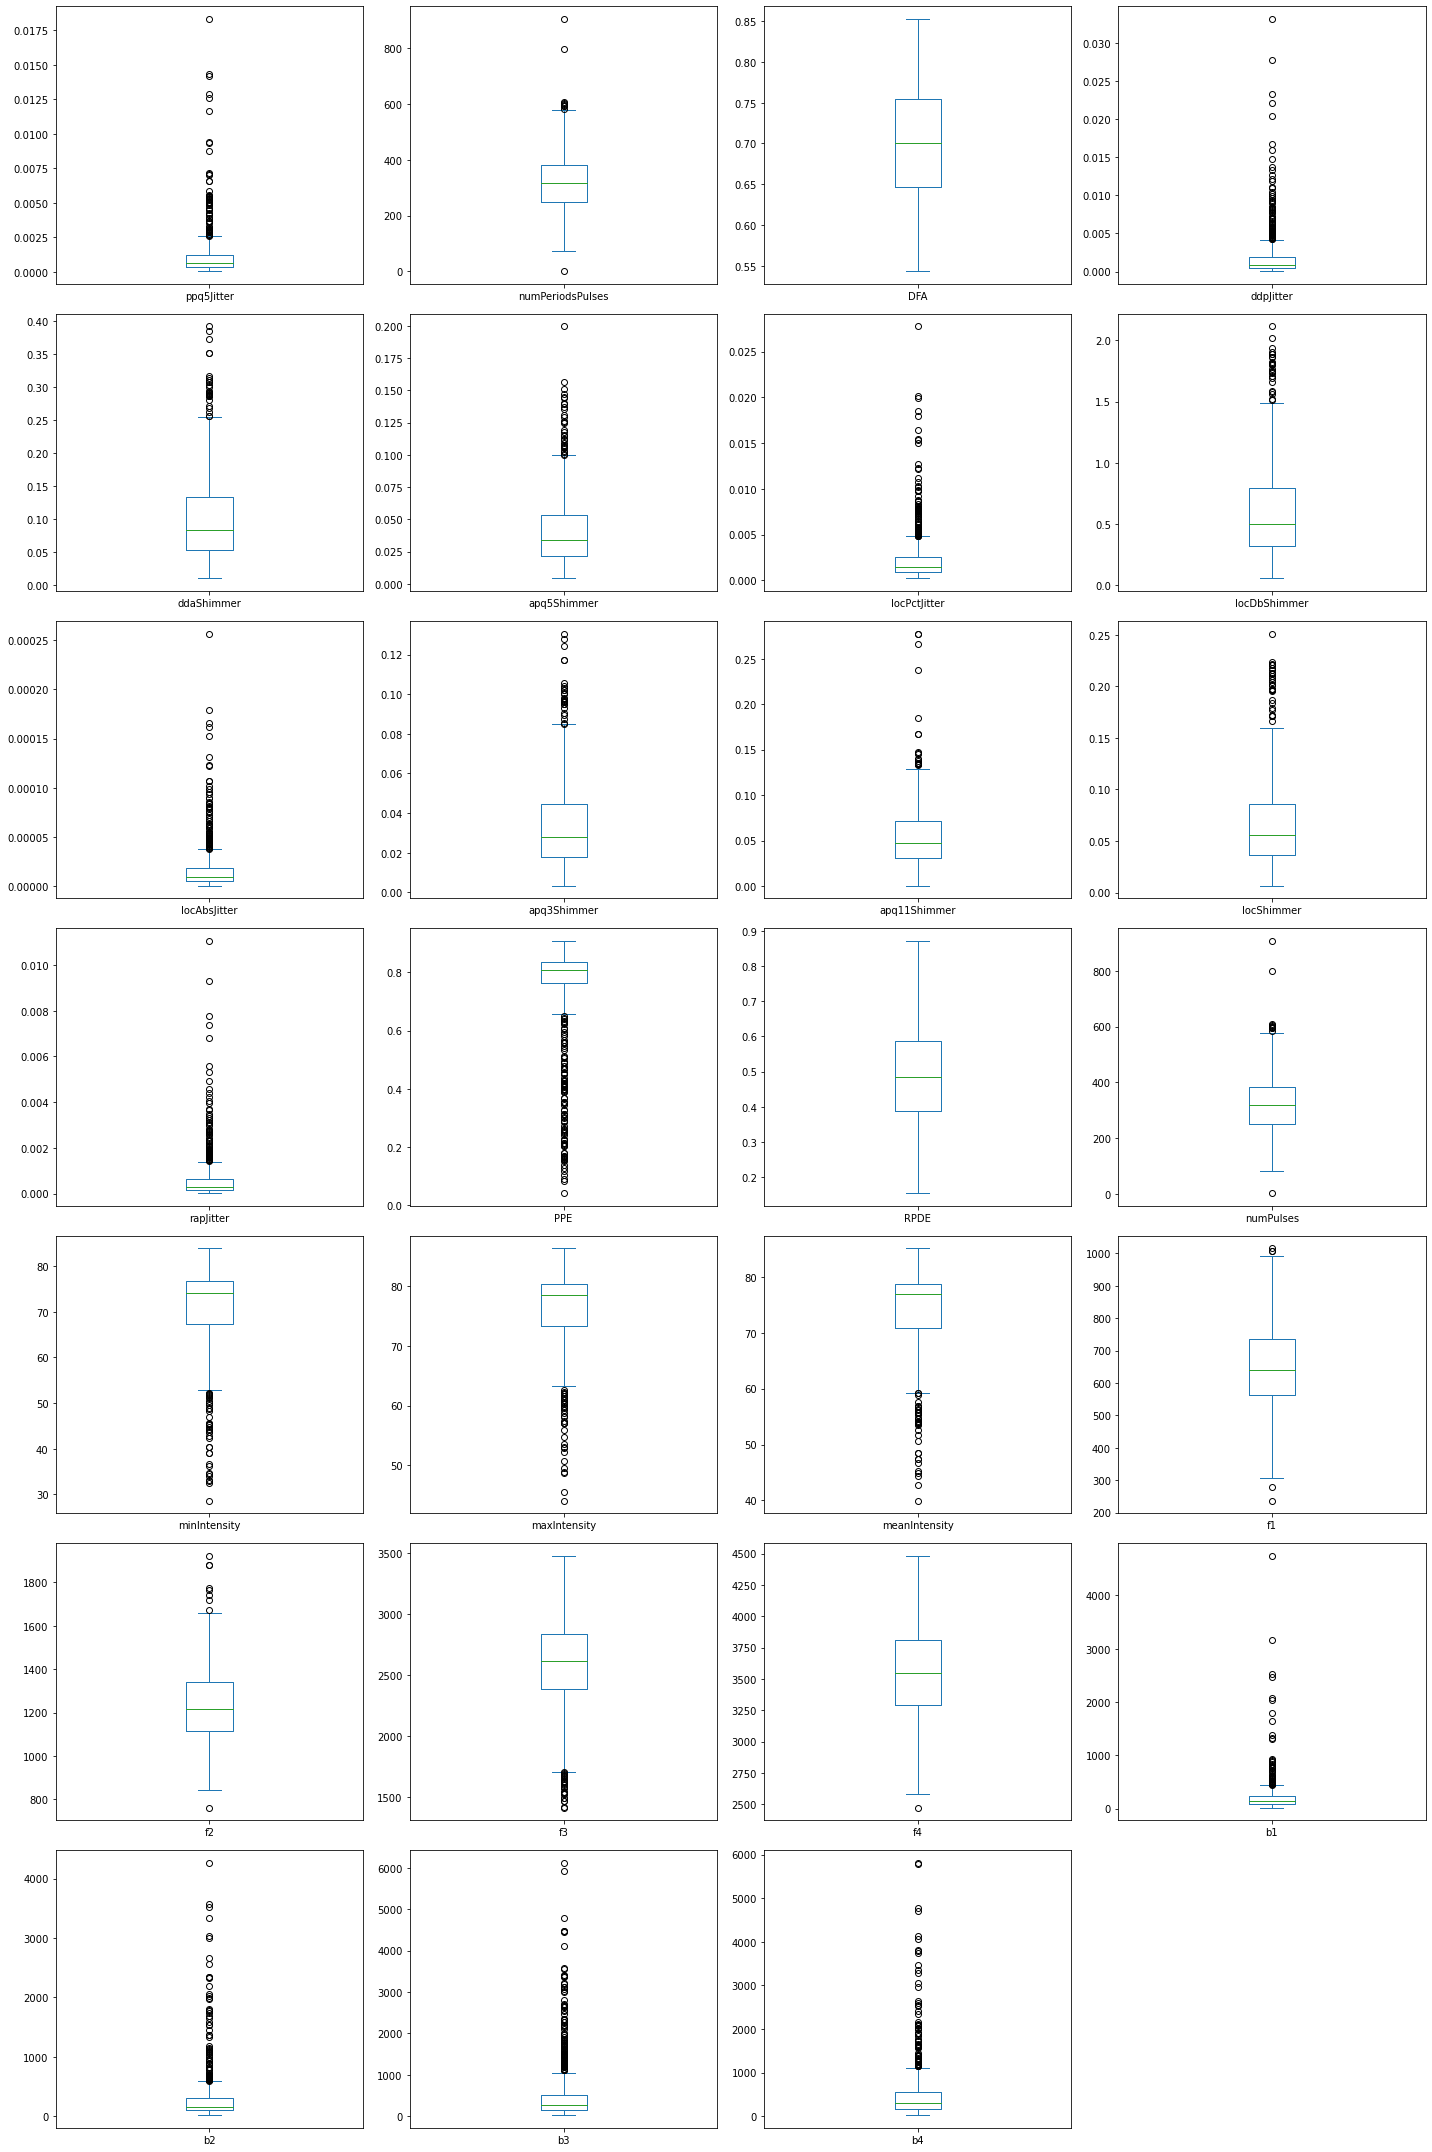

In [96]:
plt.figure(figsize = (20, 30))
plotnumber = 1

for col in extracted_df.columns:
    if plotnumber <= (len(extracted_df.columns)-1):
        ax = plt.subplot(7, 4, plotnumber)
        extracted_df[col].plot(kind='box') 
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# Outliers Detection using Z-score

In [131]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
for col in extracted_df.columns:
    sample_outliers = detect_outliers_zscore(extracted_df[col])
    print("\nnumber of outliers in {}: ".format(col), len(sample_outliers))

0.0011589665013227522 0.0016756078977672186

number of outliers in ppq5Jitter:  14
322.67857142857144 99.33673487342764

number of outliers in numPeriodsPulses:  17
0.7004139417989427 0.0696719188064783

number of outliers in DFA:  17
0.0018150854973544967 0.0029400982481348438

number of outliers in ddpJitter:  32
0.10312532490740743 0.0670523065420974

number of outliers in ddaShimmer:  42
0.04117476328042326 0.027146942288488417

number of outliers in apq5Shimmer:  57
0.0023244265277777777 0.0026262626307503867

number of outliers in locPctJitter:  72
0.6064195357804236 0.3823165222887692

number of outliers in locDbShimmer:  86
1.673391137566138e-05 2.2886192448441908e-05

number of outliers in locAbsJitter:  103
0.03437513483862433 0.022350869009808424

number of outliers in apq3Shimmer:  113
0.055366361726190444 0.033916697099098364

number of outliers in apq11Shimmer:  120
0.06747323413492066 0.04294062696699492

number of outliers in locShimmer:  139
0.0006049931626984122 0.000

In [126]:
extracted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 1 to 756
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ppq5Jitter        756 non-null    float64
 1   numPeriodsPulses  756 non-null    float64
 2   DFA               756 non-null    float64
 3   ddpJitter         756 non-null    float64
 4   ddaShimmer        756 non-null    float64
 5   apq5Shimmer       756 non-null    float64
 6   locPctJitter      756 non-null    float64
 7   locDbShimmer      756 non-null    float64
 8   locAbsJitter      756 non-null    float64
 9   apq3Shimmer       756 non-null    float64
 10  apq11Shimmer      756 non-null    float64
 11  locShimmer        756 non-null    float64
 12  rapJitter         756 non-null    float64
 13  PPE               756 non-null    float64
 14  RPDE              756 non-null    float64
 15  numPulses         756 non-null    float64
 16  minIntensity      756 non-null    float64
 1

In [108]:
data = [1, 2, 2, 2, 3, 1, 1, 15, 2, 2, 2, 3, 1, 1, 2]
mean = np.mean(data)
std = np.std(data)
print('mean of the dataset is', mean)
print('std. deviation is', std)


threshold = 3
outlier = []
for i in data:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

mean of the dataset is 2.6666666666666665
std. deviation is 3.3598941782277745
outlier in dataset is [15]


# Skewness

In [98]:
print(extracted_df.skew()) #checking for skewness

locPctJitter        4.092218
locAbsJitter        4.355471
RPDE                0.193201
ddaShimmer          1.335898
numPulses           0.717724
DFA                -0.018135
apq3Shimmer         1.335915
ppq5Jitter          4.989042
rapJitter           5.066448
ddpJitter           5.066481
locDbShimmer        1.270257
numPeriodsPulses    0.697675
PPE                -2.309712
apq5Shimmer         1.634792
locShimmer          1.419638
apq11Shimmer        1.897187
minIntensity       -1.841556
maxIntensity       -1.729063
meanIntensity      -1.718584
f1                 -0.007747
f2                  0.541195
f3                 -0.714587
f4                 -0.062801
b1                  7.781961
b2                  4.532295
b3                  3.323453
b4                  3.979171
class              -1.132702
dtype: float64


# Kurtosis

In [85]:
print(extracted_df.kurt()) #checking for kurtosis

locPctJitter        23.724845
locAbsJitter        27.689234
RPDE                -0.436597
ddaShimmer           1.762679
numPulses            2.012025
DFA                 -0.808631
apq3Shimmer          1.762652
ppq5Jitter          33.794151
rapJitter           35.982850
ddpJitter           35.979095
locDbShimmer         1.456456
numPeriodsPulses     1.990037
PPE                  4.447019
apq5Shimmer          3.501829
locShimmer           2.073222
apq11Shimmer         7.261367
minIntensity         3.928210
maxIntensity         3.478911
meanIntensity        3.343887
f1                  -0.065758
f2                   0.576107
f3                   0.259971
f4                  -0.283838
b1                  85.982561
b2                  25.221344
b3                  13.872266
b4                  20.845223
class               -0.718894
dtype: float64


# Bivariate Analysis

# Scatter plot

<AxesSubplot:xlabel='f2', ylabel='f1'>

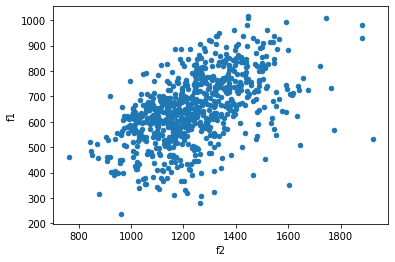

In [36]:
var1='f1'
var2 = 'f2'
data=pd.concat([extracted_df[var1], extracted_df[var2]],axis=1)
data.plot.scatter(x=var2,y=var1)

# Box Plot

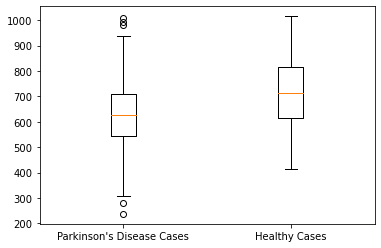

In [100]:
# Creating a box plot 
var='f1'
diseased_freq_avg = extracted_df[extracted_df["class"] == 1][var].values
healthy_freq_avg = extracted_df[extracted_df["class"] == 0][var].values

plt.boxplot([diseased_freq_avg, healthy_freq_avg])
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


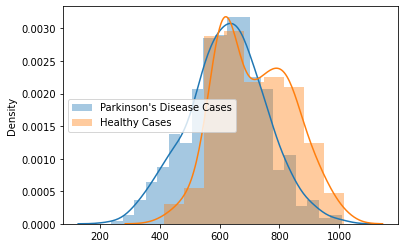

In [45]:
# Creating a distribution plot with histograms
sns.distplot(diseased_freq_avg, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_freq_avg, hist=True, label="Healthy Cases")
plt.legend()
plt.show()
